# Dataset Information

In [1]:
from sklearn.datasets import load_breast_cancer

bc=load_breast_cancer()

In [2]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [3]:
bc.target[500]

np.int64(1)

In [4]:
bc.target.shape

(569,)

In [5]:
bc.data[500]

array([1.504e+01, 1.674e+01, 9.873e+01, 6.894e+02, 9.883e-02, 1.364e-01,
       7.721e-02, 6.142e-02, 1.668e-01, 6.869e-02, 3.720e-01, 8.423e-01,
       2.304e+00, 3.484e+01, 4.123e-03, 1.819e-02, 1.996e-02, 1.004e-02,
       1.055e-02, 3.237e-03, 1.676e+01, 2.043e+01, 1.097e+02, 8.569e+02,
       1.135e-01, 2.176e-01, 1.856e-01, 1.018e-01, 2.177e-01, 8.549e-02])

In [6]:
bc.data.shape

(569, 30)

# Preprocessing

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(bc.data,bc.target,test_size=0.2,random_state=42)

In [8]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(455, 30) (114, 30)
(455,) (114,)


# Normalize

In [9]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler(feature_range=(0,1))

x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [10]:
x_train[0]

array([0.06552721, 0.25769361, 0.07732252, 0.03436883, 0.48722578,
       0.41750565, 0.73336457, 0.21744533, 0.50400427, 0.64237574,
       0.07818215, 0.18427334, 0.05314988, 0.02029892, 0.26637658,
       0.62943491, 0.76717172, 0.62928585, 0.63623129, 0.29933115,
       0.05964476, 0.28331557, 0.05597072, 0.02508436, 0.523195  ,
       0.44938009, 1.        , 0.60137457, 0.52493594, 0.52950153])

# classification

## 1. Naive Bayes

In [11]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

def calculate_metrics(y_train,y_test,y_pred_train,y_pred_test):
    acc_train=accuracy_score(y_train,y_pred_train)
    acc_test=accuracy_score(y_test,y_pred_test)
    p=precision_score(y_test,y_pred_test)
    r=recall_score(y_test,y_pred_test)
    print(f'acc train: {acc_train} - acc test: {acc_test} - precision: {p} - recall: {r}')
    return acc_train,acc_test,p,r

In [12]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [13]:
y_pred_train=gnb.predict(x_train)
y_pred_test=gnb.predict(x_test)
acc_train_gnb,acc_test_gnb,p_gnb,r_gnb=calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc train: 0.9362637362637363 - acc test: 0.9649122807017544 - precision: 0.958904109589041 - recall: 0.9859154929577465


## 2. KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8,algorithm='kd_tree',leaf_size=28)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [15]:
y_pred_train=knn.predict(x_train)
y_pred_test=knn.predict(x_test)
acc_train_knn,acc_test_knn,p_knn,r_knn=calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc train: 0.9736263736263736 - acc test: 0.9649122807017544 - precision: 0.971830985915493 - recall: 0.971830985915493


## 3. Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=64,min_samples_split=2,criterion='gini')
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=64)

In [17]:
y_pred_train=dt.predict(x_train)
y_pred_test=dt.predict(x_test)
acc_train_dt,acc_test_dt,p_dt,r_dt=calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc train: 1.0 - acc test: 0.9385964912280702 - precision: 0.9444444444444444 - recall: 0.9577464788732394


## 4. Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=1000,max_depth=32,min_samples_split=4)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=32, min_samples_split=4, n_estimators=1000)

In [19]:
y_pred_train=rf.predict(x_train)
y_pred_test=rf.predict(x_test)
acc_train_rf,acc_test_rf,p_rf,r_rf=calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc train: 1.0 - acc test: 0.9649122807017544 - precision: 0.958904109589041 - recall: 0.9859154929577465


## 5. SVM

In [20]:
from sklearn.svm import SVC

svm=SVC(kernel='poly')
svm.fit(x_train,y_train)

SVC(kernel='poly')

In [21]:
y_pred_train=svm.predict(x_train)
y_pred_test=svm.predict(x_test)
acc_train_svm,acc_test_svm,p_svm,r_svm=calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc train: 0.989010989010989 - acc test: 0.9824561403508771 - precision: 0.9726027397260274 - recall: 1.0


## 6. Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [23]:
y_pred_train=lg.predict(x_train)
y_pred_test=lg.predict(x_test)
acc_train_lg,acc_test_lg,p_lg,r_lg=calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc train: 0.9692307692307692 - acc test: 0.9824561403508771 - precision: 0.9726027397260274 - recall: 1.0


## 7.ANN

In [24]:
from sklearn.neural_network import MLPClassifier
ann=MLPClassifier(hidden_layer_sizes=256,activation='relu',solver='adam',batch_size=64)
ann.fit(x_train,y_train)

c:\Users\nedas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=64, hidden_layer_sizes=256)

In [25]:
y_pred_train=ann.predict(x_train)
y_pred_test=ann.predict(x_test)
acc_train_ann,acc_test_ann,p_ann,r_ann=calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc train: 0.989010989010989 - acc test: 0.9736842105263158 - precision: 0.9857142857142858 - recall: 0.971830985915493


# Comparison

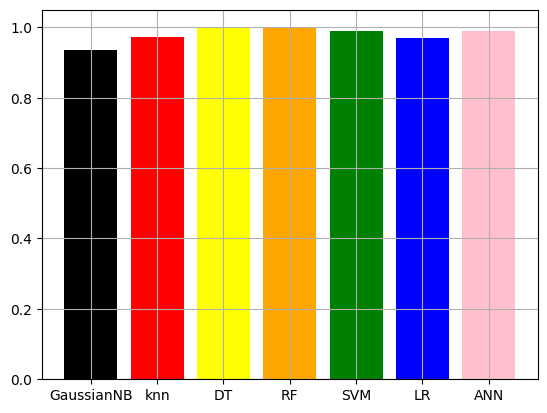

In [26]:
import matplotlib.pyplot as plt
acc_train=[acc_train_gnb,acc_train_knn,acc_train_dt,acc_train_rf,acc_train_svm,acc_train_lg,acc_train_ann]
title=['GaussianNB','knn','DT','RF','SVM','LR','ANN']
colors=['black','red','yellow','orange','green','blue','pink']
plt.bar(title,acc_train,color=colors)
plt.grid()
plt.show()

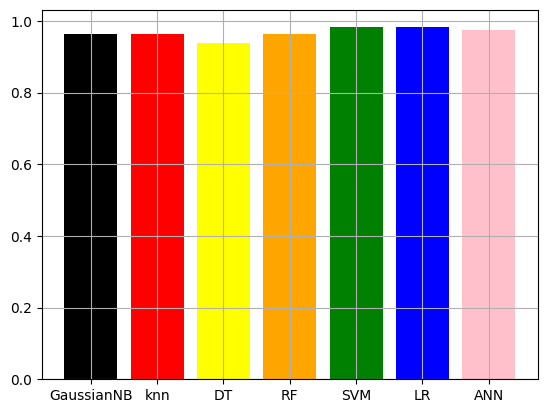

In [27]:
acc_test=[acc_test_gnb,acc_test_knn,acc_test_dt,acc_test_rf,acc_test_svm,acc_test_lg,acc_test_ann]
title=['GaussianNB','knn','DT','RF','SVM','LR','ANN']
colors=['black','red','yellow','orange','green','blue','pink']
plt.bar(title,acc_test,color=colors)
plt.grid()
plt.show()

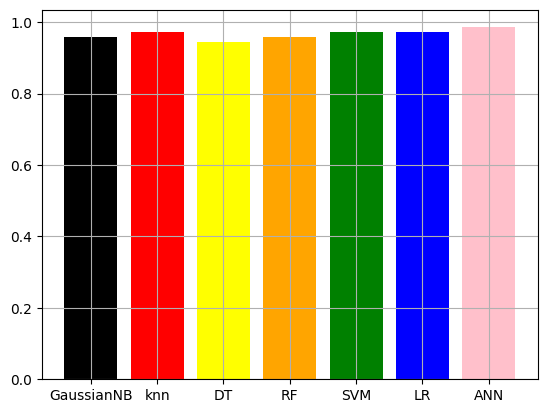

In [28]:
p=[p_gnb,p_knn,p_dt,p_rf,p_svm,p_lg,p_ann]
title=['GaussianNB','knn','DT','RF','SVM','LR','ANN']
colors=['black','red','yellow','orange','green','blue','pink']
plt.bar(title,p,color=colors)
plt.grid()

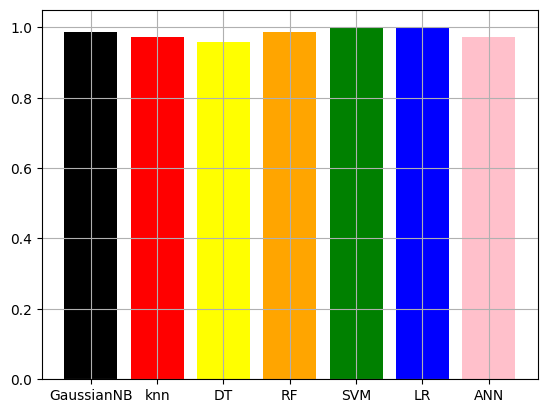

In [29]:
r=[r_gnb,r_knn,r_dt,r_rf,r_svm,r_lg,r_ann]
title=['GaussianNB','knn','DT','RF','SVM','LR','ANN']
colors=['black','red','yellow','orange','green','blue','pink']
plt.bar(title,r,color=colors)
plt.grid()